In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ptl

In [15]:
data = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")

In [16]:
data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,31371493,30535496,420585,402997,25/07/2021 09:22:38,12415,TT,0,0,0,NaN
1,Andaman and Nicobar Islands,7525,7382,129,14,24/07/2021 21:40:43,0,AN,0,0,0,NaN
2,Andhra Pradesh,1952513,1916914,13241,22358,24/07/2021 18:45:42,0,AP,0,0,0,NaN
3,Arunachal Pradesh,45703,41025,213,4465,24/07/2021 23:39:40,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,557437,536597,5114,14379,24/07/2021 23:39:42,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...
5,Bihar,724390,714223,9637,529,24/07/2021 21:09:38,1,BR,0,0,0,[June 9] : 3951 deceased cases have been repor...
6,Chandigarh,61922,61081,809,32,24/07/2021 20:12:43,0,CH,0,0,0,NaN
7,Chhattisgarh,1001037,984737,13511,2789,24/07/2021 22:33:43,0,CT,0,0,0,NaN
8,Dadra and Nagar Haveli and Daman and Diu,10640,10559,4,46,24/07/2021 21:28:41,31,DN,0,0,0,NaN
9,Delhi,1435844,1410216,25041,587,24/07/2021 20:16:41,0,DL,0,0,0,[July 14]: Value for the total tests conducted...


In [5]:
data.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

In [17]:
data.tail()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
33,Telangana,640659,627254,3780,9625,24/07/2021 19:58:43,0,TG,0,0,0,[July 27] : Telangana bulletin for the previou...
34,Tripura,75904,71103,735,4003,24/07/2021 12:04:46,63,TR,0,0,0,[Aug 4]: Tripura bulletin for the previous day...
35,Uttar Pradesh,1708152,1684471,22749,932,24/07/2021 22:54:42,0,UP,0,0,0,[Jan 1]:As no bulletin was provided for 31'st ...
36,Uttarakhand,341673,327692,7359,611,24/07/2021 19:12:40,6011,UT,0,0,0,[Oct 30]: Metric of capturing the testing data...
37,West Bengal,1522833,1492878,18064,11891,24/07/2021 19:29:46,0,WB,0,0,0,NaN


In [7]:
data.describe()

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths
count,3.800000e+01,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.634824e+06,1.590360e+06,21741.947368,22073.421053,648.421053,1882.894737,2133.000000,28.105263
std,5.050896e+06,4.911664e+06,68607.728047,70940.768451,2238.802330,6186.905692,6971.993294,91.321762
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.783525e+04,5.379575e+04,741.500000,642.000000,0.000000,7.000000,16.250000,0.000000
50%,4.444890e+05,4.290590e+05,4957.500000,1499.000000,0.000000,103.500000,146.000000,2.000000
75%,9.879195e+05,9.724628e+05,13393.250000,9779.250000,29.000000,660.000000,591.000000,7.500000
max,3.106165e+07,3.021684e+07,413097.000000,419395.000000,12320.000000,35775.000000,40527.000000,534.000000


In [19]:
data.isnull().sum()

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          24
dtype: int64

953292

In [20]:
data["Confirmed"][0]

31371493

In [11]:
import matplotlib.pyplot as plt

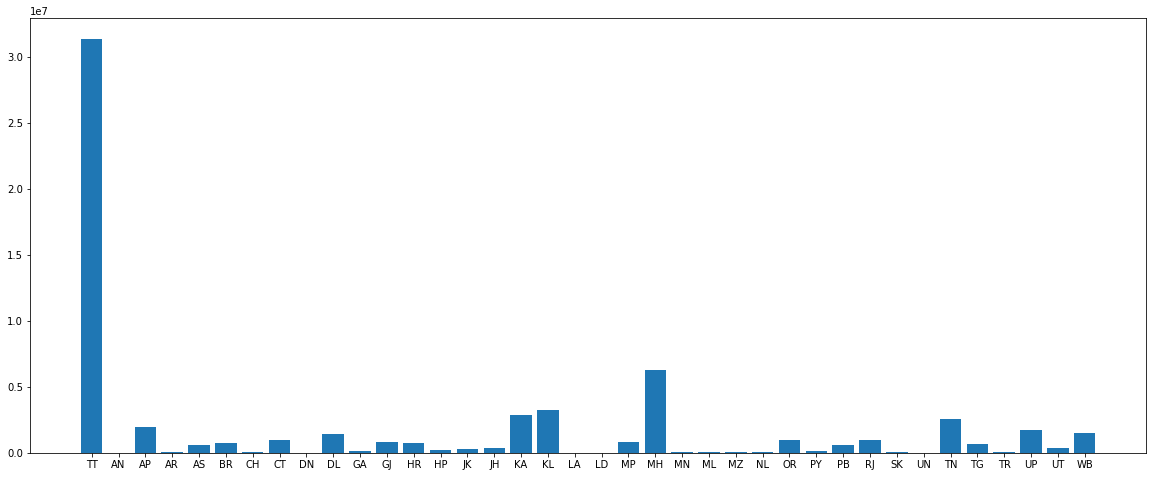

In [21]:
fig=plt.figure()
plt.bar(data["State_code"],data["Confirmed"])
fig.set_size_inches(20,8)

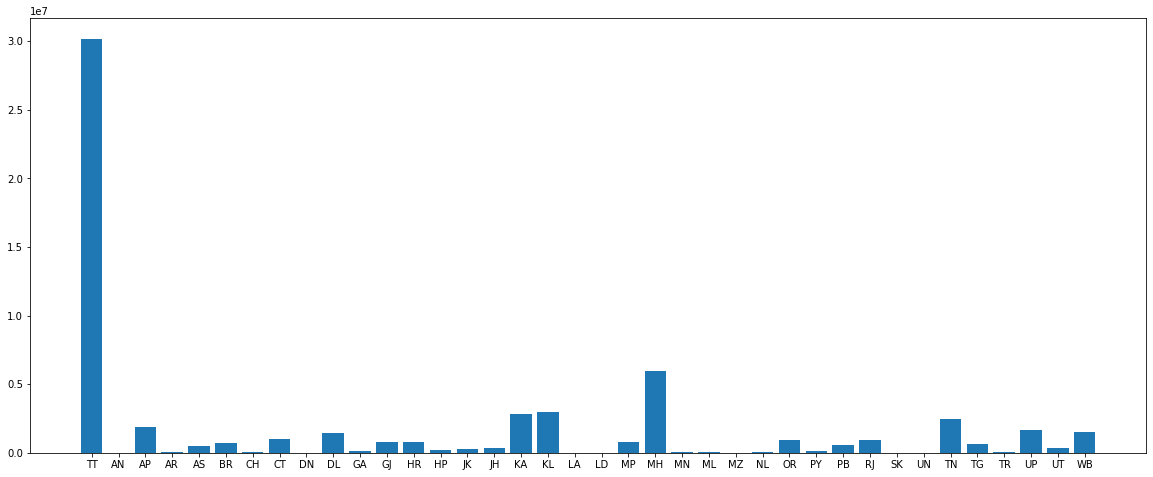

In [62]:
fig=plt.figure()
plt.bar(data["State_code"],data["Recovered"])
fig.set_size_inches(20,8)

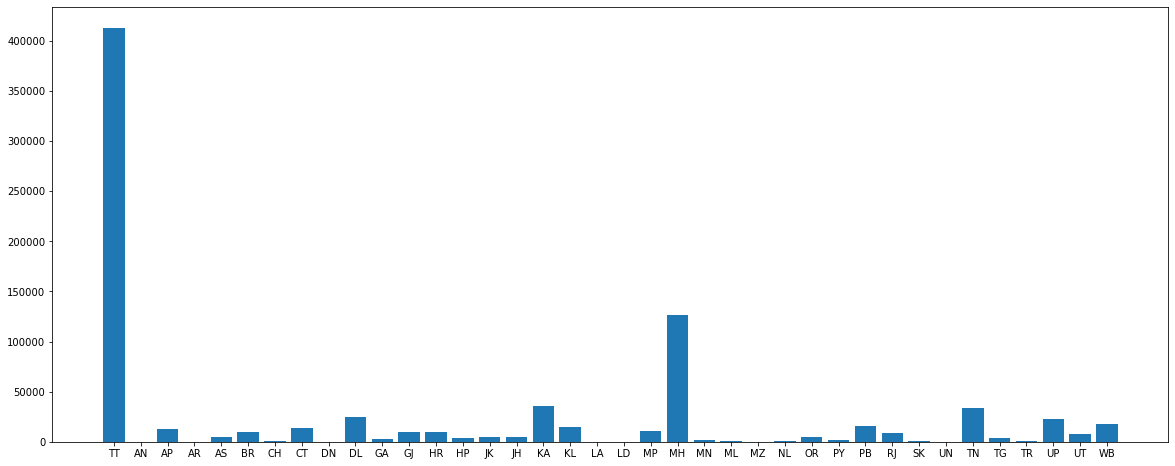

In [12]:
fig=plt.figure()
plt.bar(data["State_code"],data["Deaths"])
fig.set_size_inches(20,8)

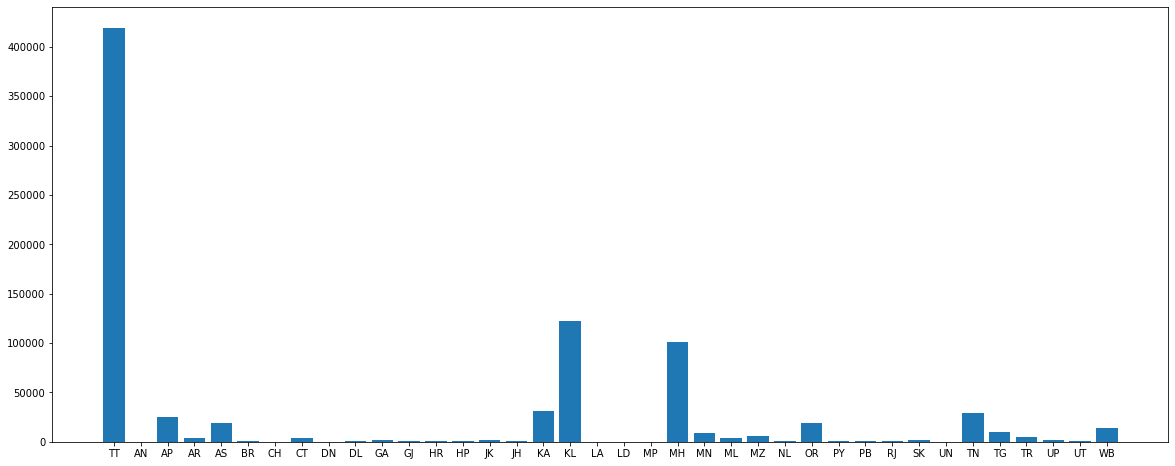

In [13]:
fig=plt.figure()
plt.bar(data["State_code"],data["Active"])
fig.set_size_inches(20,8)

In [ ]:
x=int(input())
data["Confirmed"][x]

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,25/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7224,26/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7225,27/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7226,28/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.030000e+03,7.029000e+03,7029.000000,7.029000e+03,7.029000e+03,6.869000e+03,6.869000e+03,6869.000000,7.029000e+03,7.029000e+03,...,1.110000e+03,1.110000e+03,1.110000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,7.814922e+06,4.389167e+05,2306.287381,6.362422e+06,1.453612e+06,2.765944e+06,2.414208e+06,851.620760,8.741879e+05,6.927739e+06,...,7.690703e+06,6.880566e+06,5.367421e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.184188e+07,1.773481e+06,7343.366890,2.575356e+07,6.137493e+06,1.340048e+07,1.158879e+07,4402.025676,3.755090e+06,2.810155e+07,...,2.302446e+07,2.048967e+07,1.597143e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,0.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.175242e+05,5.418000e+03,71.000000,9.775500e+04,9.175000e+03,4.871800e+04,4.379700e+04,6.000000,0.000000e+00,1.146460e+05,...,3.959898e+05,2.117192e+05,1.172310e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,6.746020e+05,3.525000e+04,594.000000,5.721760e+05,1.007090e+05,3.175840e+05,2.806130e+05,88.000000,7.775000e+03,6.152810e+05,...,2.910331e+06,2.579090e+06,1.740695e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,5.771241e+06,3.011150e+05,1725.000000,4.823176e+06,9.589240e+05,2.436831e+06,2.187238e+06,643.000000,6.242690e+05,5.146325e+06,...,6.869237e+06,6.112724e+06,4.952908e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,4.281099e+08,3.501031e+07,73933.000000,3.369178e+08,9.119212e+07,2.284330e+08,1.995989e+08,78001.000000,5.153861e+07,3.761772e+08,...,1.741290e+08,1.457187e+08,1.082622e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

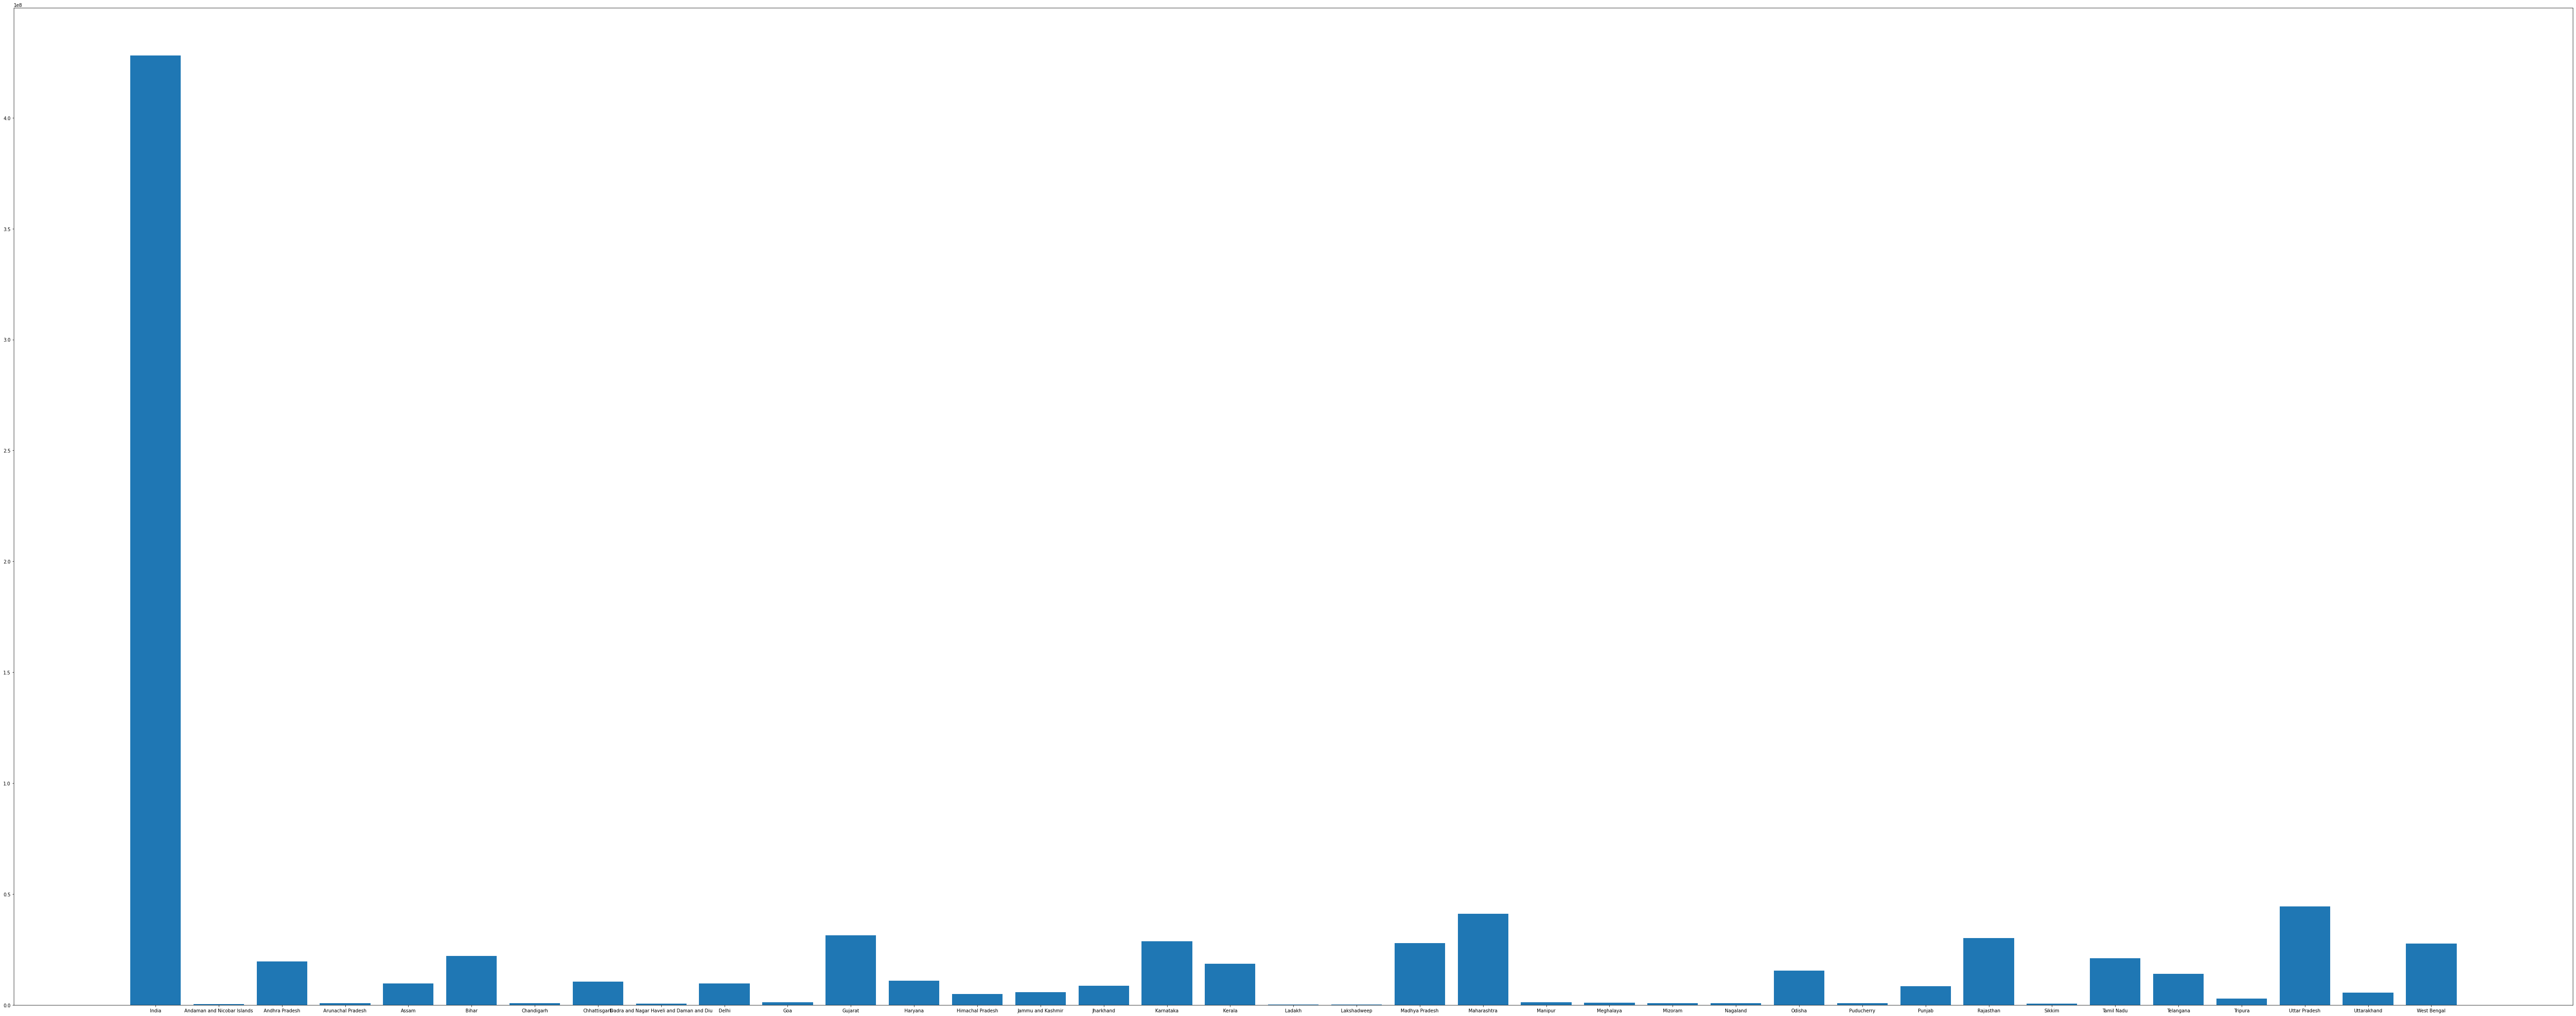